# **Data Analysis: Startups**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='rainbow')

In [25]:
startups = pd.read_excel('datasets/startup-expansion.xlsx')
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [26]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [27]:
startups[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


### **PreProcessing Data**

In [28]:
startups['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [29]:
startups['City'].value_counts()

City
Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: count, Length: 149, dtype: int64

In [30]:
startups[startups['City'] == 'Rochester']

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
9,10,Rochester,New York,Region 1,Old,2984,64906
124,125,Rochester,Minnesota,Region 1,Old,2854,18099


In [31]:
startups.isnull().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [32]:
startups.duplicated().sum()

0

### **Exploring & Analyzing Data**

In [33]:
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
126,127,Cedar Rapids,Iowa,Region 1,Old,2553,52072
88,89,Vista,California,Region 2,Old,2718,20949
132,133,Des Moines,Iowa,Region 1,Old,2995,57432
102,103,Visalia,California,Region 2,Old,2104,45632
98,99,Clovis,California,Region 2,Old,2901,20669
76,77,West Valley City,Utah,Region 2,Old,2555,49609
58,59,Ventura,California,Region 2,Old,3228,16652
79,80,Costa Mesa,California,Region 2,Old,2275,41361
143,144,Rancho Cucamonga,California,Region 2,New,2945,52366
92,93,Elgin,Illinois,Region 1,Old,2553,18215


<Axes: xlabel='Sales Region', ylabel='Number of Stores'>

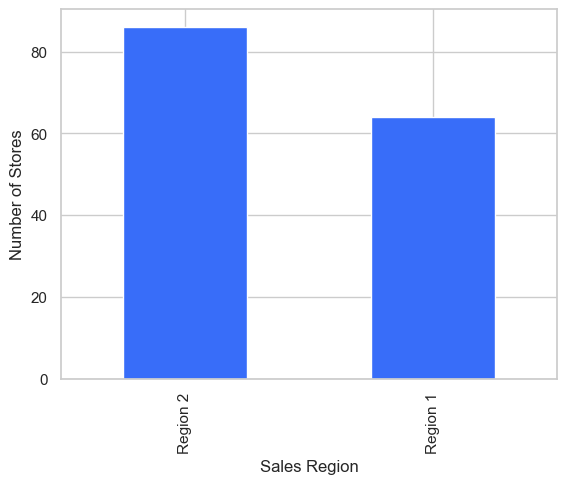

In [34]:
startups['Sales Region'].value_counts().plot(kind='bar', ylabel='Number of Stores')

#### Split best stores (Min Marketing & Max Revenue) by Expansion, Marketing and revenue

In [35]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [36]:
startups['Marketing Spend'].min()

1811

In [37]:
startups.loc[startups['Marketing Spend'].idxmin()]

Store ID                  136
City                San Mateo
State              California
Sales Region         Region 2
New Expansion             Old
Marketing Spend          1811
Revenue                 19426
Name: 135, dtype: object

In [38]:
startups['Revenue'].max()

68828

In [39]:
startups.loc[startups['Revenue'].idxmax()]

Store ID                    64
City               Little Rock
State                 Arkansas
Sales Region          Region 2
New Expansion              Old
Marketing Spend           2440
Revenue                  68828
Name: 63, dtype: object

In [40]:
startups[startups['New Expansion'] == 'New'].groupby(['State','City']).sum()['Revenue'].nlargest(10)

State       City            
Texas       Brownsville         63148
Tennessee   Chattanooga         55357
California  Rancho Cucamonga    52366
            Glendale            49376
Arizona     Tempe               48954
Illinois    Joliet              48315
            Rockford            43377
California  Thousand Oaks       40141
New Jersey  Paterson            34603
Texas       College Station     22457
Name: Revenue, dtype: int64

In [41]:
startups[startups['New Expansion'] == 'Old'].groupby(['State','City']).sum()['Revenue'].nlargest(10)

State          City          
Arkansas       Little Rock       68828
Michigan       Grand Rapids      65475
New York       Rochester         64906
California     Oxnard            64302
               Fontana           63027
Rhode Island   Providence        62337
Alabama        Birmingham        60338
Kansas         Overland Park     59887
California     San Bernardino    59870
Massachusetts  Worcester         59840
Name: Revenue, dtype: int64

In [42]:
startups['Profit'] = startups['Revenue'] - startups['Marketing Spend']
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [43]:
startups['Return_on_Marketing_Spent%'] = round((startups['Profit']/startups['Marketing Spend'])*100, 2)/100
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,Return_on_Marketing_Spent%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,19.8738
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,6.5007


In [44]:
startups.to_csv('startups-expansion-modified.csv')